# Inventory Project

  In this small scale project data set of 303 Line items our analysis has following outcomes:

  * The Line item with highest Cost, Price and Profit is 1295CA which belong to vendor Mylan Group. And it is also with maximum Lead Times.

  * However, if see in totality, Lake Ltd is the vendor with highest Profits with 23.6% then comes Heritage with 23.1%.

  * when we analyzed the warehouses, we found our maximum inventory by value is at GUT930 Warehouse 31.1% and same is also the warehouse with highest profits 31.6%.

  * When we analyzed and classified the inventory into ABC cateogries by Unit Price, we found only 60 Line Items of Category A from total 303 Line Items, comprises of 95.7% of value.

  * Similarly, when we analysed and categorized the Line Items into ABC Category by Quantity, we found that 20% Line items comprises of 96.1% of Inventory Quantity.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Machine Learning Practice/Inventory Project/Dynamic Inventory Analytics.xlsx', sheet_name=1)
display(df.head())

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price
0,1009AA,McKesson Corp,NXH382,7210.0,20.134282,145168.1732,Kg,30,48,28.76326
1,1077CA,McKesson Corp,GUT930,46516.0,16.084390,748181.4852,Kg,45,70,22.97770
2,1083AA,Kinray Ltd,FLR025,48210.0,20.314000,979337.9400,Kg,45,68,29.02000
3,1116CA,Accord Ltd,AXW291,33398.0,22.960000,766818.0800,Kg,90,140,32.80000
4,1126CA,AstraZeneca,NXH382,39270.0,22.960000,901639.2000,Kg,45,62,32.80000


In [ ]:
df.shape

(303, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SKU ID                      303 non-null    object 
 1   Vendor Name                 303 non-null    object 
 2   Warehouse ID                303 non-null    object 
 3   Current Inventory Quantity  303 non-null    float64
 4   Cost per SKU                303 non-null    float64
 5   Total Value                 303 non-null    float64
 6   Units (Nos/Kg)              303 non-null    object 
 7   Average Lead Time (days)    303 non-null    int64  
 8   Maximum Lead Time (days)    303 non-null    int64  
 9   Unit Price                  303 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 23.8+ KB


In [ ]:
df['Warehouse ID'].value_counts()

,count
Warehouse ID,
GUT930,101
NXH382,81
AXW291,69
FLR025,52


In [ ]:
df['Vendor Name'].value_counts()

,count
Vendor Name,
Lake Ltd,44
"ALK-Abello, Corp",28
Cixi Group,27
Apotex Corp,25
Allermed Group,24
Heritage,24
Macoven Group,22
McKesson Corp,18
Sun Ltd,16


In [ ]:
# Calcualting Profit Margin:
df['Profit'] = df['Unit Price'] - df['Cost per SKU']
df.head()

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
0,1009AA,McKesson Corp,NXH382,7210.0,20.134282,145168.1732,Kg,30,48,28.76326,8.628978
1,1077CA,McKesson Corp,GUT930,46516.0,16.084390,748181.4852,Kg,45,70,22.97770,6.893310
2,1083AA,Kinray Ltd,FLR025,48210.0,20.314000,979337.9400,Kg,45,68,29.02000,8.706000
3,1116CA,Accord Ltd,AXW291,33398.0,22.960000,766818.0800,Kg,90,140,32.80000,9.840000
4,1126CA,AstraZeneca,NXH382,39270.0,22.960000,901639.2000,Kg,45,62,32.80000,9.840000


In [ ]:
df.describe()

,Current Inventory Quantity,Cost per SKU,Total Value,Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
count,303.000000,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,6586.761003,2941.734376,1.786484e+05,52.937294,76.834983,4202.477681,1260.743304
std,26520.156992,12819.456788,3.164161e+05,30.966004,44.787865,18313.509697,5494.052909
min,0.000000,0.072065,0.000000e+00,15.000000,20.000000,0.102950,0.030885
25%,22.000000,21.000000,5.149025e+03,30.000000,43.000000,30.000000,9.000000
50%,219.000000,98.000000,4.573047e+04,45.000000,68.000000,140.000000,42.000000
75%,1298.250000,634.316249,1.618320e+05,60.000000,92.500000,906.166070,271.849821
max,342553.000000,122500.000000,1.910629e+06,120.000000,192.000000,175000.000000,52500.000000


In [ ]:
# The SKU ID with highest Cost, Price and Profit:

max_profit = df.query("Profit == 52500")
max_profit

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
21,1295CA,Mylan Group,AXW291,5.0,122500.0,612500.0,Kg,120,158,175000.0,52500.0


In [ ]:
# The SKU IDs with highest Average and Maxmimum Lead Time:

max_leadtime = df.query("`Average Lead Time (days)` == 120 and `Maximum Lead Time (days)` == 158")
max_leadtime

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
21,1295CA,Mylan Group,AXW291,5.0,122500.000000,612500.00000,Kg,120,158,175000.00000,52500.000000
151,2277AA,Heritage,FLR025,10253.0,4.460204,45730.47161,Kg,120,158,6.37172,1.911516


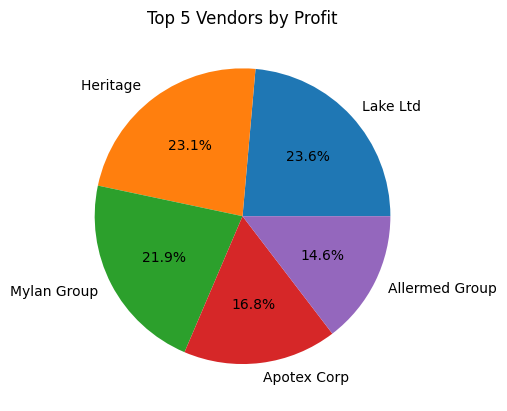

In [ ]:
# Top 5 Vendors with Highest Profit:

top_5_vendors = df.groupby('Vendor Name')['Profit'].sum().sort_values(ascending=False).head(5)

plt.pie(top_5_vendors, labels=top_5_vendors.index, autopct='%1.1f%%')
plt.title('Top 5 Vendors by Profit')
plt.show()

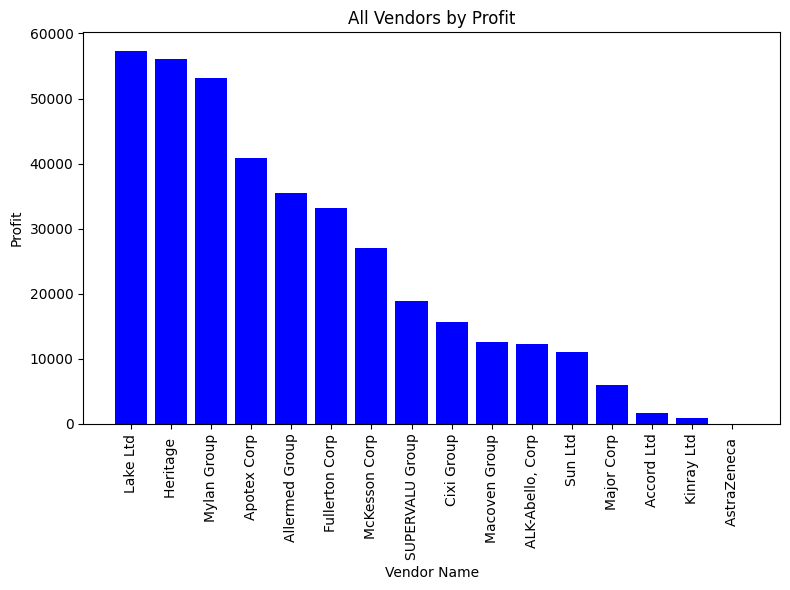

In [ ]:
# All Vendors by Profit:

vendor_by_profit = df.groupby('Vendor Name')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
plt.bar(x=vendor_by_profit.index, height=vendor_by_profit.values, color='blue')
plt.title('All Vendors by Profit')
plt.xlabel('Vendor Name')
plt.ylabel('Profit')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

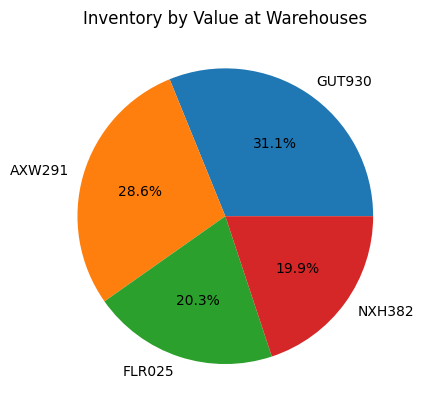

In [ ]:
# Out of 4 Warehouses, we have Maximum Inventory by Value at GUT930:

inventory_by_warehouse = df.groupby('Warehouse ID')['Total Value'].sum().sort_values(ascending=False)
plt.pie(inventory_by_warehouse, labels=inventory_by_warehouse.index, autopct='%1.1f%%')
plt.title('Inventory by Value at Warehouses')
plt.show()

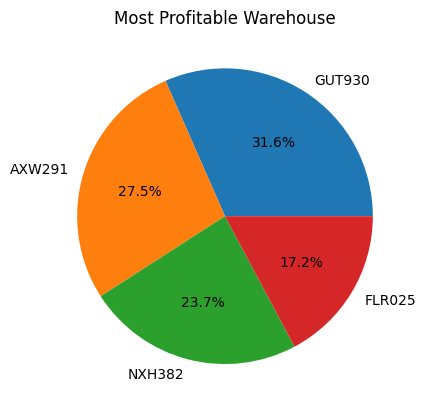

In [ ]:
# The most profitable Warehouse is:
profit_warehosue = df.groupby('Warehouse ID')['Profit'].sum().sort_values(ascending=False)
plt.pie(profit_warehosue, labels=profit_warehosue.index, autopct='%1.1f%%')
plt.title('Most Profitable Warehouse')
plt.show()

# Classification of Inventory into A, B, C Categories by Unit Prices

In [ ]:
# Sort by Unit Price in descending order
df_sorted = df.sort_values(by='Cost per SKU', ascending=False)

# Categorize as A (top 20% items by Unit Price)
cat_A = df_sorted.iloc[:int(0.2 * len(df_sorted))]
cat_A

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
21,1295CA,Mylan Group,AXW291,5.0,122500.000000,612500.00000,Kg,120,158,175000.00000,52500.000000
19,1281BA,Heritage,NXH382,3.0,97650.000000,292950.00000,Kg,60,85,139500.00000,41850.000000
18,1266CA,Lake Ltd,FLR025,5.0,83230.000000,416150.00000,Kg,60,86,118900.00000,35670.000000
17,1265CA,Allermed Group,GUT930,6.0,72450.000000,434700.00000,Kg,60,79,103500.00000,31050.000000
20,1283CA,Fullerton Corp,GUT930,0.0,68833.331000,0.00000,Kg,60,92,98333.33000,29499.999000
16,1255CA,McKesson Corp,AXW291,10.0,59150.000000,591500.00000,Kg,60,83,84500.00000,25350.000000
261,3205AA,Apotex Corp,GUT930,14.0,53410.000000,747740.00000,Kg,60,91,76300.00000,22890.000000
99,1921AA,SUPERVALU Group,AXW291,4.0,35000.000000,140000.00000,Kg,90,142,50000.00000,15000.000000
161,2348BA,Apotex Corp,NXH382,30.0,26908.000000,807240.00000,Kg,60,89,38440.00000,11532.000000
98,1908AA,Macoven Group,FLR025,22.0,19466.370000,428260.14000,Kg,120,157,27809.10000,8342.730000


In [ ]:
# Categorize as B (items from 21% to 50%)
start_index = int(0.2 * len(df_sorted))
end_index = int(0.5 * len(df_sorted))
cat_B = df_sorted.iloc[start_index : end_index]
cat_B

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
83,1801AA,Sun Ltd,FLR025,15.0,875.000000,13125.00000,Kg,30,46,1250.00000,375.000000
291,3502BA,Apotex Corp,AXW291,376.0,864.034500,324876.97200,Kg,40,55,1234.33500,370.300500
122,2053BA,Lake Ltd,NXH382,115.0,849.008223,97635.94565,Kg,60,89,1212.86889,363.860667
296,3570CA,Cixi Group,NXH382,416.0,812.000000,337792.00000,Kg,15,21,1160.00000,348.000000
240,3027CA,Lake Ltd,NXH382,27.0,802.081000,21656.18700,Kg,30,46,1145.83000,343.749000
...,...,...,...,...,...,...,...,...,...,...,...
106,1967BA,McKesson Corp,NXH382,4190.5,125.055000,524042.97750,Kg,120,163,178.65000,53.595000
78,1745BA,Major Corp,AXW291,21.0,122.500000,2572.50000,Kg,15,20,175.00000,52.500000
300,3610AA,"ALK-Abello, Corp",GUT930,275.0,109.312000,30060.80000,Kg,120,188,156.16000,46.848000
211,2767AA,"ALK-Abello, Corp",NXH382,3706.0,103.505955,383593.06920,Kg,45,62,147.86565,44.359695


In [ ]:
# Categorize as C (50% Onwards)
end_index = int(0.5 * len(df_sorted))
cat_C = df_sorted.iloc[end_index:]
cat_C

,SKU ID,Vendor Name,Warehouse ID,Current Inventory Quantity,Cost per SKU,Total Value,Units (Nos/Kg),Average Lead Time (days),Maximum Lead Time (days),Unit Price,Profit
76,1716AA,Kinray Ltd,NXH382,22.0,98.000000,2.156000e+03,Kg,15,21,140.00000,42.000000
7,1161AA,Kinray Ltd,NXH382,197.0,95.614750,1.883611e+04,Kg,90,142,136.59250,40.977750
246,3079BA,Sun Ltd,NXH382,13347.0,94.150000,1.256620e+06,Kg,15,24,134.50000,40.350000
193,2604CA,Allermed Group,FLR025,843.0,90.328000,7.614650e+04,Kg,30,42,129.04000,38.712000
42,1436BA,Lake Ltd,GUT930,81.0,87.500000,7.087500e+03,Kg,30,41,125.00000,37.500000
...,...,...,...,...,...,...,...,...,...,...,...
165,2391CA,McKesson Corp,NXH382,87174.0,0.531405,4.632470e+04,Kg,45,67,0.75915,0.227745
302,3619CA,Allermed Group,NXH382,36357.0,0.521850,1.897290e+04,Kg,15,22,0.74550,0.223650
293,3533CA,Cixi Group,GUT930,82476.0,0.450639,3.716690e+04,Kg,40,64,0.64377,0.193131
48,1484BA,Major Corp,FLR025,439.0,0.140000,6.146000e+01,Kg,15,23,0.20000,0.060000


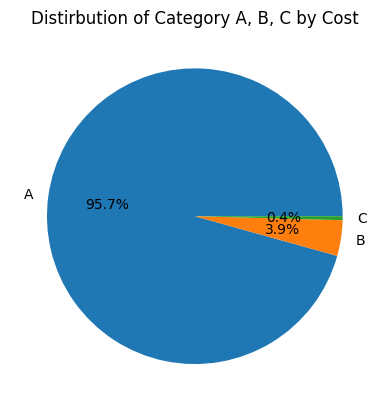

In [ ]:
# Pie plot for cat_A, cat_B and cat_C by sum of Unit Price
plt.pie([cat_A['Cost per SKU'].sum(), cat_B['Cost per SKU'].sum(), cat_C['Cost per SKU'].sum()], labels=['A', 'B', 'C'], autopct='%1.1f%%')
plt.title('Distirbution of Category A, B, C by Cost')
plt.show()

<BarContainer object of 3 artists>

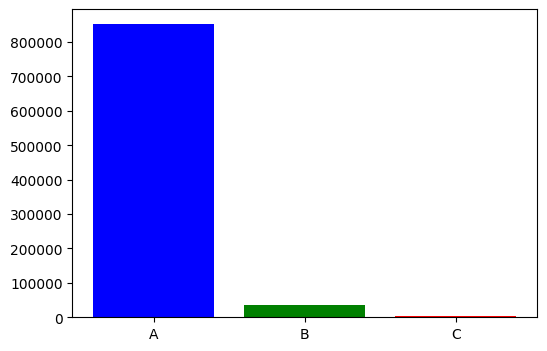

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(x=['A', 'B', 'C'], height=[cat_A['Cost per SKU'].sum(), cat_B['Cost per SKU'].sum(), cat_C['Cost per SKU'].sum()], color=['blue', 'green', 'red'])


# Classification of Inventory into A, B, C Categories by Inventory Quantity.

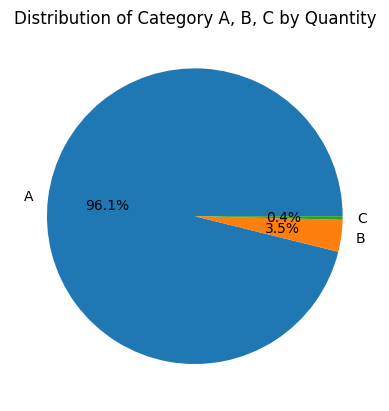

In [ ]:
# Sort by Current Inventory Quantity in descending order
df_sorted_qty = df.sort_values(by='Current Inventory Quantity', ascending=False)

# Categorize as A (top 20% by Quantity)
cat_A_Qty = df_sorted_qty.head(int(0.2 * len(df_sorted_qty)))

# Categorize as B (next 30% by Quantity)
cat_B_Qty = df_sorted_qty.iloc[int(0.2 * len(df_sorted_qty)) : int(0.5 * len(df_sorted_qty))]

# Categorize as C (remaining 50% by Quantity)
cat_C_Qty = df_sorted_qty.iloc[int(0.5 * len(df_sorted_qty)):]

# Calculate the sum of Current Inventory Quantity for each category
qty_by_category = [cat_A_Qty['Current Inventory Quantity'].sum(),
                   cat_B_Qty['Current Inventory Quantity'].sum(),
                   cat_C_Qty['Current Inventory Quantity'].sum()]

# Create a pie plot
plt.pie(qty_by_category, labels=['A', 'B', 'C'], autopct='%1.1f%%')
plt.title('Distribution of Category A, B, C by Quantity')
plt.show()

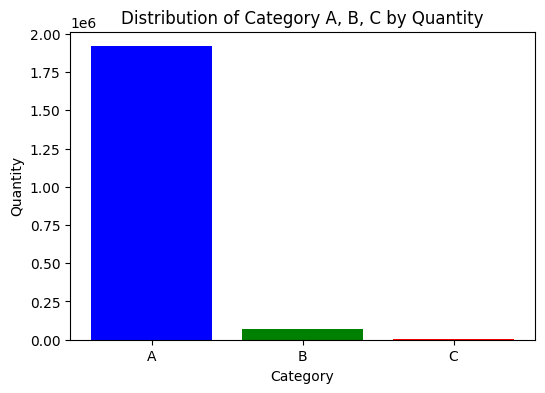

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(x=['A', 'B', 'C'], height=[cat_A_Qty['Current Inventory Quantity'].sum(), cat_B_Qty['Current Inventory Quantity'].sum(), cat_C_Qty['Current Inventory Quantity'].sum()], color=['blue', 'green', 'red'])
plt.title('Distribution of Category A, B, C by Quantity')
plt.xlabel('Category')
plt.ylabel('Quantity')
plt.show()